# Advanced Pandas course - Day 3
------
## Data investigation, preprocessing and cleaning

- Why we should do this? 
  - What do you think?

Let's see!

panads string method 
https://pandas.pydata.org/docs/reference/series.html

In [3]:
from os import chdir, getcwd, listdir

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

In [6]:
%pwd

'D:\\Hesam\\Python related activities'

In [7]:
chdir(r'D:\Hesam\Data Science\Pandas course notebook')

In [248]:
cols = ['ID', 'ParentID', 'BirthDate', 'GenderId']
df = pd.read_csv('./data/Sample2Percent_Refah_4000412.xlsx.csv', 
                 nrows = 2_000_000,
                 usecols= cols,
                 encoding = "ISO-8859-1") 

In [10]:
df['ID_length'] = df.ID.astype('str').str.len()

In [11]:
df.tail(5)

,ID,ParentID,BirthDate,GenderId,ID_length
1490986,4822361022,4822361022,1973-04-21,1,10
1490987,2816587107,2816587107,1942-07-01,1,10
1490988,6680054253,6680054253,1945-09-11,1,10
1490989,4142421696,4142421696,1977-09-21,1,10
1490990,1424664495,4711403091,2005-05-12,1,10


In [12]:
df['ID_length'].value_counts()

10    1211264
11     145619
9      120698
8       12072
7        1218
6         115
5           5
Name: ID_length, dtype: int64

In [13]:
df[df['ID_length'] > 10].head(20)

,ID,ParentID,BirthDate,GenderId,ID_length
15,10356235203,1303505313,1998-08-08,1,11
16,12718204818,5372883069,2019-12-09,1,11
35,10128534159,10128534159,1967-06-22,1,11
39,13229152476,6688531413,NaN,2,11
53,13253682858,696991944,NaN,1,11
70,10323997026,10323997026,1952-03-21,1,11
88,10053039342,6837747264,2000-03-22,2,11
90,10457574042,10457574042,1985-03-21,1,11
95,12270500808,3788149593,2018-03-20,2,11
112,10432394097,10432394097,1990-09-19,1,11


#### Check to see if any space make ID length issue

```python 
len(' 9552231653 ') 
```

In [14]:
df['ID'] = df.ID.astype('str').str.strip()

In [15]:
df['ID_length'].value_counts()

10    1211264
11     145619
9      120698
8       12072
7        1218
6         115
5           5
Name: ID_length, dtype: int64

#### Hack the National IDs!

fake Nationa_ID = $a \ \  \times$ Nationa_ID  + $b$

where $a$ and $b$ int between 1 , ... , 9

In [16]:
df['PID_length'] = df.ParentID.astype('str').str.len()

In [17]:
df.PID_length.value_counts()

10    1284406
9      134135
11      57386
8       13625
7        1304
6         128
5           7
Name: PID_length, dtype: int64

In [18]:
df['ParentID'] = df.ParentID.astype('str').str.strip()

In [19]:
df.PID_length.value_counts()

10    1284406
9      134135
11      57386
8       13625
7        1304
6         128
5           7
Name: PID_length, dtype: int64

In [20]:
df[(df.PID_length >= 10) & (df.ID_length > 9)].shape[0] 

1265582

In [21]:
df.shape[0]

1490991

In [22]:
df[(df.PID_length >= 10) & (df.ID_length > 9)].shape[0] / df.shape[0] * 100

84.88193423032064

In [23]:
df[(df.PID_length >= 10) & (df.ID_length > 9)].shape

(1265582, 6)

In [24]:
(df.PID_length >= 10).sum()

1341792

In [25]:
(df.ID_length > 9)

0          False
1           True
2          False
3          False
4          False
           ...  
1490986     True
1490987     True
1490988     True
1490989     True
1490990     True
Name: ID_length, Length: 1490991, dtype: bool

Apply condition on *National ID* length

- Exercise: Logic on *National ID* 

In [19]:
df['ID_length'] = df.ID.astype('str').str.len()
df['PID_length'] = df.ParentID.astype('str').str.len()

In [26]:
df_ten = df[(df['PID_length'] == 10 ) & (df['ID_length'] == 10 )]
df_ten.shape

(1107959, 6)

In [28]:
del df_ten

In [27]:
df.head(10)

,ID,ParentID,BirthDate,GenderId,ID_length,PID_length
0,385996899,391863876,1978-03-22,2,9,9
1,2633686968,2633686968,1995-02-05,1,10,10
2,312125928,1981002597,1970-05-13,2,9,10
3,70847160,70847160,1969-03-21,1,8,8
4,663191175,9230116821,2004-06-19,2,9,10
5,5795894952,94240284,1950-08-23,2,10,8
6,3274221522,5459677650,2002-09-21,2,10,10
7,2376999375,5848907706,1994-02-07,2,10,10
8,9857876841,8845436658,1967-02-12,2,10,10
9,6987751668,9286957827,2009-04-03,2,10,10


These 2 columns are not useful any more. 

- Why?

    > Better to drop any not useful data, especially those you can simply add again!
    
- What to do?

    ```python
    df.drop(columns=['ID_length', 'PID_length'], inplace =True) 

    ```



In [51]:
df.drop(columns=['ID_length', 'PID_length'], inplace =True)

## How to count number of N-ID under each Parent ID?
- They are not to be children
- These contains those with are supported by a `Parent ID`, i.e. `افراد تحت تکفل سرپرسرت خانوار` 

In [29]:
df.ParentID.value_counts()

2183597619     17
10311409698    17
9366930582     14
1066060086     14
1729873005     14
               ..
5992310946      1
3461072298      1
6604316757      1
9061954542      1
5604263043      1
Name: ParentID, Length: 500000, dtype: int64

In [32]:
df.ParentID.astype(int).value_counts(bins=3)

OverflowError: Python int too large to convert to C long

In [33]:
family_count = df.ParentID.value_counts()

2183597619     17
10311409698    17
9366930582     14
1066060086     14
1729873005     14
               ..
5992310946      1
3461072298      1
6604316757      1
9061954542      1
5604263043      1
Name: ParentID, Length: 500000, dtype: int64

In [34]:
family_count.rename('Count_p')

2183597619     17
10311409698    17
9366930582     14
1066060086     14
1729873005     14
               ..
5992310946      1
3461072298      1
6604316757      1
9061954542      1
5604263043      1
Name: Count_p, Length: 500000, dtype: int64

<AxesSubplot:>

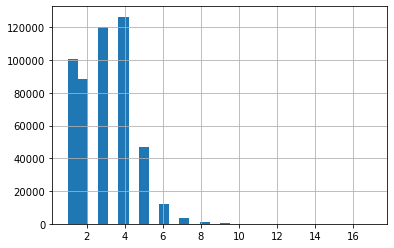

In [38]:
family_count.hist(bins=30)

In [39]:
df.query('ParentID == "2183597619"')

,ID,ParentID,BirthDate,GenderId,ID_length,PID_length
113160,7032610752,2183597619,1967-04-21,2,10,10
193548,3520510326,2183597619,2009-02-09,1,10,10
209007,6924574686,2183597619,2012-08-16,2,10,10
263136,6429609525,2183597619,2004-03-20,1,10,10
349275,12347218245,2183597619,2017-09-06,1,11,10
400433,1508179404,2183597619,2006-07-15,2,10,10
447744,9450298752,2183597619,2000-10-28,2,10,10
688716,3064471344,2183597619,2009-10-23,2,10,10
887536,7067291586,2183597619,1982-03-21,2,10,10
970482,6511318302,2183597619,2013-08-29,1,10,10


#### Extracting those who are 'سرپرست' of themselves as well

In [45]:
df_temp = df[(df.ID == df.ParentID )] # Parent
df_temp.head(20)

,ID,ParentID,BirthDate,GenderId,ID_length,PID_length
1,2633686968,2633686968,1995-02-05,1,10,10
3,70847160,70847160,1969-03-21,1,8,8
10,6236060907,6236060907,1969-09-24,2,10,10
11,5710446360,5710446360,1977-03-21,1,10,10
19,5494437573,5494437573,1985-06-18,1,10,10
22,7772969400,7772969400,1982-03-11,1,10,10
25,8784211317,8784211317,1982-12-22,1,10,10
34,3649260084,3649260084,1997-07-04,1,10,10
35,10128534159,10128534159,1967-06-22,1,11,11
40,8956218330,8956218330,1988-06-02,1,10,10


In [43]:
df_temp.shape

(500000, 6)

In [46]:
temp_df = df[(df.ParentID == '8323722933') | (df.ParentID =='9690770763')]
temp_df

,ID,ParentID,BirthDate,GenderId,ID_length,PID_length
16410,9131954334,9690770763,2005-03-23,1,10,10
16447,7548644952,9690770763,1999-06-23,2,10,10
30321,7135657569,9690770763,2011-05-07,2,10,10
39847,9482258457,8323722933,2011-04-19,2,10,10
42599,950827536,8323722933,2006-05-14,2,9,10
66317,7804182372,8323722933,2014-11-08,1,10,10
73817,8558163639,9690770763,2013-08-30,1,10,10
74295,1969120797,8323722933,2014-11-08,1,10,10
318843,3279279282,8323722933,1980-05-20,2,10,10
327629,9510717705,8323722933,1995-10-26,2,10,10


In [47]:
temp_df.ID.value_counts()

2921508321    1
9690770763    1
5733280695    1
6757991358    1
2319041406    1
950827536     1
9482258457    1
9690941610    1
6706975140    1
3713936067    1
7964202912    1
8323722933    1
3622254327    1
8558163639    1
355633119     1
1969120797    1
7804182372    1
7548644952    1
7135657569    1
9510717705    1
9692041107    1
3279279282    1
9131954334    1
9074667207    1
Name: ID, dtype: int64

*Exersice*

Look for algorithm to verfiy `National ID` and apply it as next integrity check to data set?

- How many records out of 1_000_000 pass this?

http://www.aliarash.com/article/codemeli/codemeli.htm 



# Investigate number of childern, order birth and age
## How to do?
   - Any recommendation
   - Use rank and partition to label child rank
   - Any other method?
   
   
## Data issue identification

In [48]:
df = df.assign(child_rank = df.groupby('ParentID').cumcount() + 1)
#df['row_num'] = df.groupby('city').cumcount() + 1

 - What is cumcount?
    - check pandas website
    - Let's check 
        - trick on investigate of investigate to see what exist ;-)

In [52]:
df.head()

,ID,ParentID,BirthDate,GenderId,child_rank
0,385996899,391863876,1978-03-22,2,1
1,2633686968,2633686968,1995-02-05,1,1
2,312125928,1981002597,1970-05-13,2,1
3,70847160,70847160,1969-03-21,1,1
4,663191175,9230116821,2004-06-19,2,1


In [54]:
df[(df.ParentID == '8323722933') ]

,ID,ParentID,BirthDate,GenderId,child_rank
39847,9482258457,8323722933,2011-04-19,2,1
42599,950827536,8323722933,2006-05-14,2,2
66317,7804182372,8323722933,2014-11-08,1,3
74295,1969120797,8323722933,2014-11-08,1,4
318843,3279279282,8323722933,1980-05-20,2,5
327629,9510717705,8323722933,1995-10-26,2,6
415670,7964202912,8323722933,2003-07-13,1,7
460002,8323722933,8323722933,1975-06-11,1,8
756699,5733280695,8323722933,2004-01-01,2,9
791848,3713936067,8323722933,2000-04-13,2,10


In [55]:
df = (df.assign(family_rank = df.sort_values(['BirthDate'], ascending=True)
.groupby(['ParentID'])
.cumcount()+1)
#.query('r < 3')
.sort_values(['ParentID', 'family_rank']))

In [58]:
df[df.family_rank>16].head()

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
541325,12349732242,10311409698,2017-10-19,1,4,17
1032876,13257415539,2183597619,NaN,2,12,17


Explain *assign*, SQL logic, ...

In [60]:
df[(df.ParentID == '8323722933')]  # '816722293999')] 8323722933

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
460002,8323722933,8323722933,1975-06-11,1,8,1
318843,3279279282,8323722933,1980-05-20,2,5,2
327629,9510717705,8323722933,1995-10-26,2,6,3
791848,3713936067,8323722933,2000-04-13,2,10,4
916487,2921508321,8323722933,2001-10-26,2,11,5
415670,7964202912,8323722933,2003-07-13,1,7,6
756699,5733280695,8323722933,2004-01-01,2,9,7
42599,950827536,8323722933,2006-05-14,2,2,8
39847,9482258457,8323722933,2011-04-19,2,1,9
1000624,355633119,8323722933,2011-08-26,2,12,10


Is there any change?

Why do you think ranking does not work?

How to fix?

    - Fix date format 

In [61]:
df.dtypes

ID             object
ParentID       object
BirthDate      object
GenderId        int64
child_rank      int64
family_rank     int64
dtype: object

In [62]:
df.head()

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
1465912,3289974624,10000002972,1981-09-01,2,3,1
1065883,10000002972,10000002972,1982-07-21,1,2,2
746988,6593387838,10000002972,2012-06-28,1,1,3
265800,10000027326,10000027326,1955-10-24,1,1,1
501974,1148918544,10000027326,1959-09-03,2,3,2


In [63]:
# check error result and explain reason 
# ways to manage
df.BirthDate = pd.to_datetime(df.BirthDate, format='%Y-%m-%d')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 3213-09-22 00:00:00

In [64]:
df.BirthDate = pd.to_datetime(df.BirthDate, format='%Y-%m-%d', errors ='ignore') #'coerce')

In [66]:
df.head(5)

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
1465912,3289974624,10000002972,1981-09-01,2,3,1
1065883,10000002972,10000002972,1982-07-21,1,2,2
746988,6593387838,10000002972,2012-06-28,1,1,3
265800,10000027326,10000027326,1955-10-24,1,1,1
501974,1148918544,10000027326,1959-09-03,2,3,2


#### Find a way to catch sample where BirthDate is `NaT`

In [76]:
pd.isna(pd.NaT)

True

In [75]:
pd.isnull(pd.NaT)

True

In [68]:
df[df.BirthDate.isna()]

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
583435,13250236767,10001280819,NaN,2,1,4
269420,13353737577,10002403440,NaN,2,3,4
710822,13334747484,10003242300,NaN,2,2,3
1480752,13340953818,10003242300,NaN,2,4,4
550860,13245374577,10004841669,NaN,2,2,3
...,...,...,...,...,...,...
1201337,9996879756,9996250242,NaN,2,2,2
59994,13244633748,9998036571,NaN,2,1,4
1052096,9998243457,9998243457,NaN,2,1,1
1348001,13254941886,9998288967,NaN,1,3,3


In [69]:
df.dtypes

ID             object
ParentID       object
BirthDate      object
GenderId        int64
child_rank      int64
family_rank     int64
dtype: object

In [70]:
df.BirthDate.value_counts().sort_index()

1893-04-20    1
1902-07-26    1
1902-12-23    1
1906-03-22    1
1908-06-01    1
             ..
3221-01-29    1
3221-02-05    1
3221-02-19    1
3221-03-03    1
3221-03-06    1
Name: BirthDate, Length: 33651, dtype: int64

As soon as column is of type `datetime64[ns]`, datetime related functionalities are available

[dt-accessor](https://pandas.pydata.org/docs/user_guide/basics.html#dt-accessor)

`df.BirthDate.dt.`


In [71]:
df = (df.assign(family_rank = df.sort_values(['BirthDate'], ascending=True)
.groupby(['ParentID'])
.cumcount()+1)
#.query('r < 3')
.sort_values(['ParentID', 'family_rank']))

In [73]:
df[(df.ParentID == '8323722933') ]

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
460002,8323722933,8323722933,1975-06-11,1,8,1
318843,3279279282,8323722933,1980-05-20,2,5,2
327629,9510717705,8323722933,1995-10-26,2,6,3
791848,3713936067,8323722933,2000-04-13,2,10,4
916487,2921508321,8323722933,2001-10-26,2,11,5
415670,7964202912,8323722933,2003-07-13,1,7,6
756699,5733280695,8323722933,2004-01-01,2,9,7
42599,950827536,8323722933,2006-05-14,2,2,8
39847,9482258457,8323722933,2011-04-19,2,1,9
1000624,355633119,8323722933,2011-08-26,2,12,10


- Work to identify twins?
- mother pregnancy age analysis?
- calculate age difference between first and last child?
       - max?
- Data issue identification
   - junk records 
     - Birthdates! __3213-09-2, 3220-04-20__
     
    |ID|ParentID|BirthDate|	GenderId|	child_rank|
    |--|------------|------------|----------|-------------|
    |10080426276	|10080426276|	3213-09-2| | | |
    |4380159294	|1015085073|	3220-04-20| ||

    
   - Fraud detection?

In above example, we find a set of twin. How to label them with same rank?

In [78]:
df[df.BirthDate.dt.year() > 2022]

AttributeError: Can only use .dt accessor with datetimelike values

In [79]:
df[df.BirthDate > '2022-11-01']

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
82654,10080426276,10080426276,3213-09-22,2,1,2
1114920,4380159294,1015085073,3220-04-20,1,3,3
564518,2641266228,10322211927,3219-05-06,2,4,8
432337,10323224217,10323224217,3221-01-23,2,1,1
556408,1039820373,1039820373,3218-03-21,1,2,2
...,...,...,...,...,...,...
419132,9037049010,9037049010,3218-03-20,1,1,1
307475,9249419580,9249419580,3191-05-31,1,1,1
967168,9489674250,9489674250,3220-09-22,1,1,1
1014307,9087364743,9588841401,3211-06-26,2,2,2


In [165]:
dff = df[df.BirthDate.isna()!=True].pivot_table(index='ParentID', values = ['BirthDate'],
                     aggfunc= ['first','last'])   #np.max() - np.min())


In [166]:
dff.head(20)

,first,last
,BirthDate,BirthDate
ParentID,,
10000002972,1981-09-01,2012-06-28
10000027326,1955-10-24,1979-04-21
10000060290,1979-05-29,2013-09-04
10000110474,1975-03-25,2010-08-15
10000123266,1975-09-11,2004-11-21
10000126833,1969-09-21,2017-05-16
10000153524,1980-09-21,1984-03-21
10000217853,1983-09-23,2015-10-30


In [82]:
df[df.ID == '8323722933']

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
460002,8323722933,8323722933,1975-06-11,1,8,1


In [83]:
df[df.ID == df.ParentID].shape

(500000, 6)

In [84]:
df[df.ID == df.ParentID].head(20)

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
1065883,10000002972,10000002972,1982-07-21,1,2,2
265800,10000027326,10000027326,1955-10-24,1,1,1
493029,10000060290,10000060290,1979-05-29,1,1,1
686473,10000110474,10000110474,1976-05-10,1,1,2
971774,10000123266,10000123266,1975-09-11,2,2,1
1420021,10000126833,10000126833,1969-09-21,1,5,1
621427,10000153524,10000153524,1980-09-21,1,1,1
42097,10000217853,10000217853,1983-09-23,1,2,1
1074125,1000022862,1000022862,1939-03-29,1,4,1
1132421,1000023846,1000023846,1978-05-22,2,2,1


In [85]:
df[df.ID != df.ParentID].shape

(990991, 6)

From 1 milion records, how many seems to be rationally correct?

    -> Exercise. If other *National ID* verfication logic to be applied, what is the status on whole dataset?

In [87]:
dff.head(20)

,first,last
,BirthDate,BirthDate
ParentID,,
10000002972,1981-09-01,2012-06-28
10000027326,1955-10-24,1979-04-21
10000060290,1979-05-29,2013-09-04
10000110474,1975-03-25,2010-08-15
10000123266,1975-09-11,2004-11-21
10000126833,1969-09-21,2017-05-16
10000153524,1980-09-21,1984-03-21
10000217853,1983-09-23,2015-10-30


In [167]:
dff.columns

MultiIndex([('first', 'BirthDate'),
            ( 'last', 'BirthDate')],
           )

In [168]:
dff.columns = ['first_child_BD', 'last_child_BD']

In [169]:
dff.dtypes

first_child_BD    object
last_child_BD     object
dtype: object

In [170]:
dff = dff.reset_index()
dff.head()

,ParentID,first_child_BD,last_child_BD
0,10000002972,1981-09-01,2012-06-28
1,10000027326,1955-10-24,1979-04-21
2,10000060290,1979-05-29,2013-09-04
3,10000110474,1975-03-25,2010-08-15
4,10000123266,1975-09-11,2004-11-21


In [171]:
dff.shape

(498319, 3)

In [176]:
dff = dff[(dff['first_child_BD'] < '2022-12-01') &
          (dff['last_child_BD'] < '2022-12-01')]


dff['first_child_BD'] = pd.to_datetime(dff['first_child_BD'], format='%Y-%m-%d', errors ='ignore') #'coerce')
dff['last_child_BD'] = pd.to_datetime(dff['last_child_BD'], format='%Y-%m-%d', errors ='ignore') #'coerce')
dff = dff[(dff['first_child_BD'].isna() !=True) &
         (dff['last_child_BD'].isna() !=True)]

dff.shape

(498137, 3)

In [177]:
dff.dtypes

ParentID                  object
first_child_BD    datetime64[ns]
last_child_BD     datetime64[ns]
dtype: object

In [178]:
dff['Delta'] = (dff['last_child_BD'] - dff['first_child_BD'])

In [179]:
dff.head()

,ParentID,first_child_BD,last_child_BD,Delta
0,10000002972,1981-09-01,2012-06-28,11258 days
1,10000027326,1955-10-24,1979-04-21,8580 days
2,10000060290,1979-05-29,2013-09-04,12517 days
3,10000110474,1975-03-25,2010-08-15,12927 days
4,10000123266,1975-09-11,2004-11-21,10664 days


In [180]:
dff['Delta_year'] = (dff['last_child_BD'].dt.year - dff['first_child_BD'].dt.year)

In [181]:
dff.Delta_year.dt.year() # not working? why?

AttributeError: Can only use .dt accessor with datetimelike values

In [182]:
dff.head()

,ParentID,first_child_BD,last_child_BD,Delta,Delta_year
0,10000002972,1981-09-01,2012-06-28,11258 days,31
1,10000027326,1955-10-24,1979-04-21,8580 days,24
2,10000060290,1979-05-29,2013-09-04,12517 days,34
3,10000110474,1975-03-25,2010-08-15,12927 days,35
4,10000123266,1975-09-11,2004-11-21,10664 days,29


In [183]:
dff['Delta_year_calculated'] = dff.Delta.dt.days/365.25
dff.head()

,ParentID,first_child_BD,last_child_BD,Delta,Delta_year,Delta_year_calculated
0,10000002972,1981-09-01,2012-06-28,11258 days,31,30.822724
1,10000027326,1955-10-24,1979-04-21,8580 days,24,23.490760
2,10000060290,1979-05-29,2013-09-04,12517 days,34,34.269678
3,10000110474,1975-03-25,2010-08-15,12927 days,35,35.392197
4,10000123266,1975-09-11,2004-11-21,10664 days,29,29.196441


In [184]:
dff['Delta_year'] = round(( dff["last_child_BD"] - dff["first_child_BD"] ).dt.days / 365.25, 1)
dff.head(10)

,ParentID,first_child_BD,last_child_BD,Delta,Delta_year,Delta_year_calculated
0,10000002972,1981-09-01,2012-06-28,11258 days,30.8,30.822724
1,10000027326,1955-10-24,1979-04-21,8580 days,23.5,23.490760
2,10000060290,1979-05-29,2013-09-04,12517 days,34.3,34.269678
3,10000110474,1975-03-25,2010-08-15,12927 days,35.4,35.392197
4,10000123266,1975-09-11,2004-11-21,10664 days,29.2,29.196441
5,10000126833,1969-09-21,2017-05-16,17404 days,47.6,47.649555
6,10000153524,1980-09-21,1984-03-21,1277 days,3.5,3.496235
7,10000217853,1983-09-23,2015-10-30,11725 days,32.1,32.101300
8,1000022862,1939-03-29,1993-06-12,19799 days,54.2,54.206708
9,1000023846,1978-05-22,2004-03-28,9442 days,25.9,25.850787


In [185]:
dff.Delta.value_counts(bins=30)
# options of value_counts

(-36 days +02:49:55.199999999, 1196 days 01:36:00]    120963
(11960 days 16:00:00, 13156 days 17:36:00]             66546
(10764 days 14:24:00, 11960 days 16:00:00]             65346
(13156 days 17:36:00, 14352 days 19:12:00]             53219
(9568 days 12:48:00, 10764 days 14:24:00]              47182
(14352 days 19:12:00, 15548 days 20:48:00]             33348
(8372 days 11:12:00, 9568 days 12:48:00]               23750
(1196 days 01:36:00, 2392 days 03:12:00]               19489
(15548 days 20:48:00, 16744 days 22:24:00]             17072
(2392 days 03:12:00, 3588 days 04:48:00]               12926
(16744 days 22:24:00, 17941 days 00:00:00]              7702
(7176 days 09:36:00, 8372 days 11:12:00]                7631
(3588 days 04:48:00, 4784 days 06:24:00]                5753
(17941 days 00:00:00, 19137 days 01:36:00]              3794
(5980 days 08:00:00, 7176 days 09:36:00]                2546
(4784 days 06:24:00, 5980 days 08:00:00]                2197
(19137 days 01:36:00, 20

In [186]:
dff.Delta.max()

Timedelta('35882 days 00:00:00')

In [187]:
dff.shape

(498137, 6)

In [189]:
print(f'Max difference between childern birth is {dff.Delta_year.max()} Wooo! \n')
print(f'Median difference between childern birth is {dff.Delta_year.median()} \n')
print(f'Median difference between childern birth is {dff.Delta_year.median()} \n')

Max difference between childern birth is 98.2 Wooo! 

Median difference between childern birth is 29.8


<AxesSubplot:>

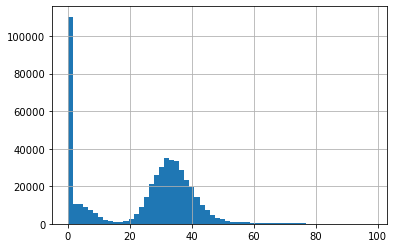

In [193]:
dff.Delta_year.hist(bins=60)

What is reasonable range of child age difference, i.e. age eldest child - age youngest child?

- This is not real Parent, `سرپرست خانوار`

```
98.2! 

```

<AxesSubplot:>

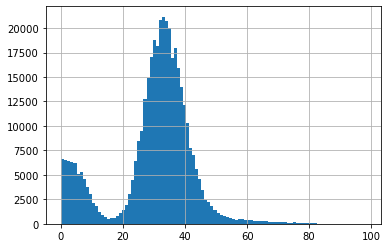

In [194]:
dff.query('Delta_year > 0').Delta_year.hist(bins=100)

Google "pandas pivot_table aggfunc calculate date difference"

Take a look at sample [stackoverflow solution](https://stackoverflow.com/questions/61681897/how-to-create-a-pivot-table-on-pandas-date-column-and-calculate-time-difference)
    


## Calculate distribution of children per parent

In [199]:
dfff = df.head(10).pivot_table(index='ParentID', values = ['ID', 'GenderId','BirthDate'],
                     aggfunc= {'ID': [np.count_nonzero, lambda x:','.join(str(x))],
                               'GenderId': lambda x:' '.join(str(x)),
                               'BirthDate':['first','last']
                              }
                     )#np.max() - np.min())

dfff.head()

BirthDate              \
                  first        last   
ParentID                              
10000002972  1981-09-01  2012-06-28   
10000027326  1955-10-24  1979-04-21   
10000060290  1979-05-29  2013-09-04   

                                                      GenderId  \
                                                      <lambda>   
ParentID                                                         
10000002972  1 4 6 5 9 1 2         2 \n 1 0 6 5 8 8 3      ...   
10000027326  2 6 5 8 0 0         1 \n 5 0 1 9 7 4         2...   
10000060290  4 9 3 0 2 9           1 \n 1 0 9 9 5 6 2      ...   

                                                            ID                
                                                    <lambda_0> count_nonzero  
ParentID                                                                      
10000002972  1,4,6,5,9,1,2, , , , , ,3,2,8,9,9,7,4,6,2,4,\n...             3  
10000027326  2,6,5,8,0,0, , , , ,1,0,0,0,0,0,2,7,3,2,6,\n,5...             3  
10000060290  4,9,3,0,2,9, , , , , ,1,0,0,0,0,0,6,0,2,9,0,\n...             4

- **Why it is like this?**
   - What is the issue?
- Note the 

   - `.head(10)` otherwise it take much more time to provide output!
   - check `dtypes`

In [200]:
df.dtypes

ID             object
ParentID       object
BirthDate      object
GenderId        int64
child_rank      int64
family_rank     int64
dtype: object

In [202]:
df.head()

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
1465912,3289974624,10000002972,1981-09-01,2,3,1
1065883,10000002972,10000002972,1982-07-21,1,2,2
746988,6593387838,10000002972,2012-06-28,1,1,3
265800,10000027326,10000027326,1955-10-24,1,1,1
501974,1148918544,10000027326,1959-09-03,2,3,2


In [64]:
# df.BirthDate = pd.to_datetime(df.BirthDate, format='%Y-%m-%d', errors ='ignore') #'coerce')

In [213]:
df = df.assign(ID = lambda x: x['ID'].astype(str),
               BirthDate = lambda x:  pd.to_datetime(x['BirthDate'], format='%Y-%m-%d', errors ='ignore'),# note
               # BirthDate = lambda x: x['BirthDate'].dt.strftime('%Y%m%d'),
               ParentID = lambda x: x['ParentID'].astype(str),
               GenderId = lambda x: x['GenderId'].astype('str'),
               child_rank = lambda x: x['child_rank'].astype('category')
              )

In [214]:
df.dtypes

ID               object
ParentID         object
BirthDate        object
GenderId         object
child_rank     category
family_rank       int64
dtype: object

In [208]:
df.head()

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
1465912,3289974624,10000002972,1981-09-01,2,3,1
1065883,10000002972,10000002972,1982-07-21,1,2,2
746988,6593387838,10000002972,2012-06-28,1,1,3
265800,10000027326,10000027326,1955-10-24,1,1,1
501974,1148918544,10000027326,1959-09-03,2,3,2


In [215]:
dfff = df.pivot_table(index='ParentID', values = ['ID', 'GenderId','BirthDate'],
                     aggfunc= {'ID': [np.count_nonzero, lambda x:','.join(x)],
                               'GenderId': lambda x:' '.join(x),
                               'BirthDate':['first','last']
                              }
                     )#np.max() - np.min())

dfff.head()

BirthDate             GenderId  \
                  first        last <lambda>   
ParentID                                       
10000002972  1981-09-01  2012-06-28    2 1 1   
10000027326  1955-10-24  1979-04-21    1 2 2   
10000060290  1979-05-29  2013-09-04  1 2 1 1   
10000110474  1975-03-25  2010-08-15  2 1 2 2   
10000123266  1975-09-11  2004-11-21      2 2   

                                                       ID                
                                               <lambda_0> count_nonzero  
ParentID                                                                 
10000002972             3289974624,10000002972,6593387838             3  
10000027326             10000027326,1148918544,1900741776             3  
10000060290  10000060290,2793581679,1498633497,7564096950             4  
10000110474  1830649980,10000110474,7531608468,5166883284             4  
10000123266                        10000123266,9995967219             2

In [228]:
df_parent_child = df.pivot_table(index='ParentID', values = ['ID', 'GenderId','BirthDate'],
                     aggfunc= {'ID': [np.count_nonzero, lambda x:','.join(x)],
                               'GenderId': lambda x:' '.join(x),
                               'BirthDate': lambda x: set(x)
                              }
                     )#np.max() - np.min())

df_parent_child.head()

BirthDate GenderId  \
                                                     <lambda> <lambda>   
ParentID                                                                 
10000002972              {1982-07-21, 2012-06-28, 1981-09-01}    2 1 1   
10000027326              {1955-10-24, 1979-04-21, 1959-09-03}    1 2 2   
10000060290  {2013-09-04, 2009-11-15, 1979-05-29, 1983-09-05}  1 2 1 1   
10000110474  {2001-10-13, 1976-05-10, 1975-03-25, 2010-08-15}  2 1 2 2   
10000123266                          {1975-09-11, 2004-11-21}      2 2   

                                                       ID                
                                               <lambda_0> count_nonzero  
ParentID                                                                 
10000002972             3289974624,10000002972,6593387838             3  
10000027326             10000027326,1148918544,1900741776             3  
10000060290  10000060290,2793581679,1498633497,7564096950             4  
10000110474  1830649980,10000110474,7531608468,5166883284             4  
10000123266                        10000123266,9995967219             2

In [229]:
df_parent_child.columns

MultiIndex([('BirthDate',      '<lambda>'),
            ( 'GenderId',      '<lambda>'),
            (       'ID',    '<lambda_0>'),
            (       'ID', 'count_nonzero')],
           )

In [230]:
df_parent_child.reset_index(inplace=True)

In [231]:
df_parent_child.columns = ['ParentID', 'Distinct BirthDate', 'List Gender', 'List_N_ID', 'count_nonzero_N_ID']

In [232]:
df_parent_child.head(8)

,ParentID,Distinct BirthDate,List Gender,List_N_ID,count_nonzero_N_ID
0,10000002972,"{1982-07-21, 2012-06-28, 1981-09-01}",2 1 1,"3289974624,10000002972,6593387838",3
1,10000027326,"{1955-10-24, 1979-04-21, 1959-09-03}",1 2 2,"10000027326,1148918544,1900741776",3
2,10000060290,"{2013-09-04, 2009-11-15, 1979-05-29, 1983-09-05}",1 2 1 1,"10000060290,2793581679,1498633497,7564096950",4
3,10000110474,"{2001-10-13, 1976-05-10, 1975-03-25, 2010-08-15}",2 1 2 2,"1830649980,10000110474,7531608468,5166883284",4
4,10000123266,"{1975-09-11, 2004-11-21}",2 2,"10000123266,9995967219",2
5,10000126833,"{1997-02-20, 1969-09-21, 2002-03-27, 1977-02-0...",1 2 1 2 2,"10000126833,7139090376,2021686323,2301551544,9...",5
6,10000153524,"{1984-03-21, 1980-09-21}",1 2,"10000153524,3665656107",2
7,10000217853,"{2010-11-13, 1990-09-21, 2015-10-30, 1983-09-23}",1 2 2 2,"10000217853,7361507955,5296157760,9999963735",4


In [233]:
df_child1 = df[df.child_rank == 1]
df_child1.shape

(500000, 6)

In [234]:
df_child1.head()

,ID,ParentID,BirthDate,GenderId,child_rank,family_rank
746988,6593387838,10000002972,2012-06-28,1,1,3
265800,10000027326,10000027326,1955-10-24,1,1,1
493029,10000060290,10000060290,1979-05-29,1,1,1
686473,10000110474,10000110474,1976-05-10,1,1,2
874858,9995967219,10000123266,2004-11-21,2,1,2


## Our aim for end of class for data cleaning with Pandas

Sample of complex data cleaning - Data preprocessing you can write with `Pandas`.

```python
def data_cleaning(input_csv):
    df = (pd.read_csv(input_csv, parse_dates=['date', 'tansaction_rdate'])   
          # basic read file. It is highly recommended to use `read_csv` features. Here we convert `date`, `tansaction_rdate`  columns into `datetime` in read operation.  
            .rename(columns=str.lower) # rename columns or change all to lower or upper
            .rename(columns=lambda s: s.strip())  # to remove out of name 'spaces' in name of columns 
            .rename(columns= {'date':'date_key', 'customer_msisdn':'msisdn_nsk'}) # rename columns or change all to lower or upper
            .drop('payment_id', axis=1) # drop column or drop row
            .assign(date_key=lambda x: x['date_key'].dt.strftime('%Y%m%d'),  # make new columns from existintg - useful for calculation, data_time, change to categorical
                    msisdn_nsk_clean=lambda x: x['msisdn_nsk'].astype(str).str[2:],  # get rid of the first 2 digits - substr in SQL
                    msisdn_lastdigit=lambda x: x['msisdn_nsk'].astype(str).str[-1],  # extract last digit to be used
                    msisdn_nsk_extended=lambda x: '935' + x['msisdn_nsk'].astype(str).str[2:] + '935',  # add text - Concatenate in SQL
                    msisdn_check=lambda x: x['msisdn_nsk'].str.contains(r'\d{11}'),  # regex usecase sample: check if columns contains pattern of 11 decimal digit
                    tansaction=lambda x: x['tansaction'].replace({'%':''}, regex=True).astype('float'),  # remove '%' character from 'tansaction' column and convert to float
                    temp_hour=lambda x: x['transaction_date'].dt.hour)  # extract hour 
            .query('delearname in ("SNAPCAB", "SNAPFOOD", "SNAPMARKET")')   # filtering on column with `in`
            #.sort_values(by = ['granted_gift_irr'], ascending=False)
            .assign(rank=lambda x: x.sort_values(['granted_gift_irr', 'msisdn_lastdigit','temp_hour'], #  make rank based on 3 columns; similar to `SQL` partition by
                                                 ascending=(False, True, True)
                                                 )
                    .groupby(['date_key', 'msisdn_lastdigit'])
                    .cumcount()
                    + 1    
                    )
            #.query("rank < 3")
            .sort_values(["date_key", "rank"])  # sort values
          )
    return df
    
df = data_cleaning('marketplace_cashback_20perc_20220517.csv')
```

Work to make date with columns of `Year`, `Month`, `Day`

```python
# 20220517
df['Date'] = df['Year'] + '/' + df['Month'] + '/' + df['Day']  # 2022/05/17
# type change
```

In [249]:
cols = ['ID', 'ParentID', 'BirthDate', 'GenderId']
df = pd.read_csv('./data/Sample2Percent_Refah_4000412.xlsx.csv', 
                 nrows = 2_000_000,
                 usecols= cols,
                 encoding = "ISO-8859-1") 

In [256]:
df = df[df.BirthDate.isna()!=True]

In [257]:
df.dtypes

ID            int64
ParentID      int64
BirthDate    object
GenderId      int64
dtype: object

In [264]:
#df.BirthDate = pd.to_datetime(df.BirthDate, format='%Y-%m-%d', errors ='ignore') #'coerce')
df = df.assign(date=lambda x: pd.to_datetime(x['BirthDate'], format='%Y-%m-%d', errors ='ignore') )

In [265]:
df.dtypes

ID            int64
ParentID      int64
BirthDate    object
GenderId      int64
date         object
dtype: object

In [261]:
df.assign(date=lambda x: x['BirthDate'].dt.strftime('%Y_%m_%d  %c:%B'))

AttributeError: Can only use .dt accessor with datetimelike values

In [322]:
df.head()


,ID,ParentID,BirthDate,GenderId
0,385996899,391863876,1978-03-22,2
1,2633686968,2633686968,1995-02-05,1
2,312125928,1981002597,1970-05-13,2
3,70847160,70847160,1969-03-21,1
4,663191175,9230116821,2004-06-19,2


In [239]:
%pwd

'D:\\Hesam\\Data Science\\Pandas course notebook'

## Some handy Notebook tricks + managing loaded data

In [240]:
%whos

Variable          Type                          Data/Info
---------------------------------------------------------
chdir             builtin_function_or_method    <built-in function chdir>
cols              list                          n=4
df                DataFrame                                       ID     <...>1490991 rows x 6 columns]
df_child1         DataFrame                                       ID     <...>[500000 rows x 6 columns]
df_parent_child   DataFrame                                ParentID      <...>[500000 rows x 5 columns]
df_temp           DataFrame                                      ID    Pa<...>[500000 rows x 6 columns]
dff               DataFrame                                ParentID first<...>[498137 rows x 6 columns]
dfff              DataFrame                                   BirthDate  <...>[500000 rows x 5 columns]
family_count      Series                        2183597619     17\n103114<...>gth: 500000, dtype: int64
getcwd            builtin_func

In [241]:
%who

chdir	 cols	 df	 df_child1	 df_parent_child	 df_temp	 dff	 dfff	 family_count	 
getcwd	 listdir	 np	 pd	 plt	 temp_df	 


In [114]:
df_parents.info() # df_parents.size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743242 entries, 1 to 999999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   ParentID  743242 non-null  int64
 1   ID        743242 non-null  int64
dtypes: int64(2)
memory usage: 33.1 MB


In [266]:
sample_text = 'df_lab lab lab'

In [267]:
sample_text.rfind('df')

0

In [269]:
files_in_ram = %who

chdir	 cols	 df	 df_child1	 df_parent_child	 df_temp	 dff	 dfff	 family_count	 
getcwd	 listdir	 np	 pd	 plt	 sample_text	 temp_df	 


In [274]:
files_in_ram

In [277]:
f = [df, df_child1, df_parent_child, df_temp, dff, dfff,temp_df]

In [279]:
for x in f:
    del x

## Project for course:

As we disccussed during sessions, it is good to delve into and investigate the dataset in one Jupyter notebook:

  - What are your anlysis questions on dataset?
     - Write down questions and answers you have.
     - What are answers you extract.
     - 
  - Did you face any **data quality issues**?
     - List them with short explnation of why you consider these as data issue.